In [1]:

import os
import numpy as np

import cv2
import matplotlib.pyplot as plt

In [2]:
# Set dataset path
DATASET_PATH = r"D:\Dataset\dataset_blood_group"

In [3]:
# Load images
def load_sample_images():
    blood_groups = os.listdir(DATASET_PATH)  # Get folder names (A+, B-, etc.)
    sample_images = {}

    for group in blood_groups:
        group_path = os.path.join(DATASET_PATH, group)
        images = [img for img in os.listdir(group_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
        
        if images:
            img_path = os.path.join(group_path, images[0])  # Load first image
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
            sample_images[group] = img

    return sample_images

In [ ]:
# Visualize sample images
sample_images = load_sample_images()
plt.figure(figsize=(12, 6))
for i, (label, img) in enumerate(sample_images.items()):
    plt.subplot(2, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.axis('off')
plt.show()

<Figure size 1200x600 with 0 Axes>

Found Blood Groups: ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']
Loading image: D:\Dataset\dataset_blood_group\A+\cluster_0_1001.BMP
Loading image: D:\Dataset\dataset_blood_group\A-\cluster_1_0.BMP
Loading image: D:\Dataset\dataset_blood_group\AB+\cluster_4_100.BMP
Loading image: D:\Dataset\dataset_blood_group\AB-\cluster_5_1003.BMP
Loading image: D:\Dataset\dataset_blood_group\B+\cluster_2_10.BMP
Loading image: D:\Dataset\dataset_blood_group\B-\cluster_3_1017.BMP
Loading image: D:\Dataset\dataset_blood_group\O+\cluster_6_1004.BMP
Loading image: D:\Dataset\dataset_blood_group\O-\cluster_7_1002.BMP


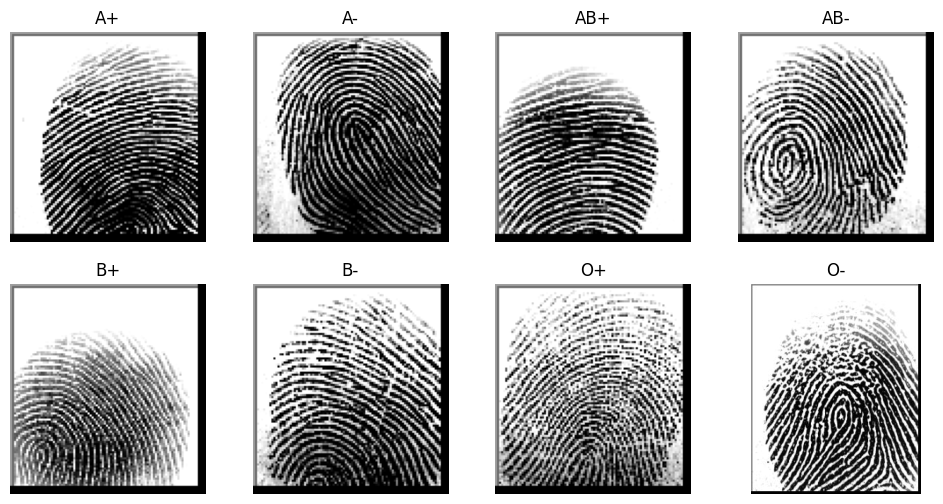

In [ ]:


# Set dataset path
DATASET_PATH = r"D:\Dataset\dataset_blood_group"

# Load images with debugging
def load_sample_images():
    blood_groups = os.listdir(DATASET_PATH)  # Get folder names (A+, B-, etc.)
    sample_images = {}

    print(f"Found Blood Groups: {blood_groups}")  # Debugging Step 1

    for group in blood_groups:
        group_path = os.path.join(DATASET_PATH, group)

        if not os.path.isdir(group_path):
            print(f"Skipping {group_path}, not a directory")
            continue

        images = [img for img in os.listdir(group_path) if img.endswith(('.png', '.jpg', '.jpeg','.BMP'))]
        
        if images:
            img_path = os.path.join(group_path, images[0])  # Load first image
            print(f"Loading image: {img_path}")  # Debugging Step 2

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
            if img is None:
                print(f"⚠️ Image {img_path} could not be loaded. Skipping.")
                continue

            sample_images[group] = img

    return sample_images

# Visualize sample images
sample_images = load_sample_images()

if sample_images:
    plt.figure(figsize=(12, 6))
    for i, (label, img) in enumerate(sample_images.items()):
        plt.subplot(2, 4, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(label)
        plt.axis('off')
    
    plt.show()
else:
    print(" No images loaded! Check dataset structure.")


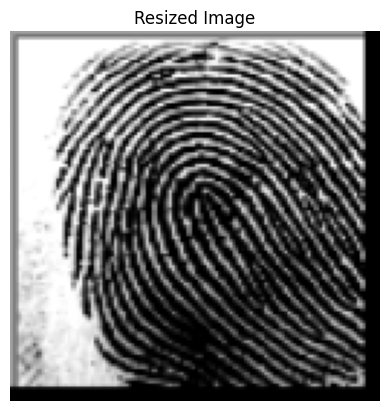

In [ ]:


# Define image size
IMG_SIZE = (128, 128)

# Function to preprocess an image
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    img = cv2.resize(img, IMG_SIZE)  # Resize to 128x128
    return img

# Test on one image
test_img_path = r"D:\Dataset\dataset_blood_group\A-\cluster_1_0.BMP"  # Replace with an actual image path
processed_img = preprocess_image(test_img_path)

# Show the processed image
import matplotlib.pyplot as plt
plt.imshow(processed_img, cmap='gray')
plt.title("Resized Image")
plt.axis('off')
plt.show()




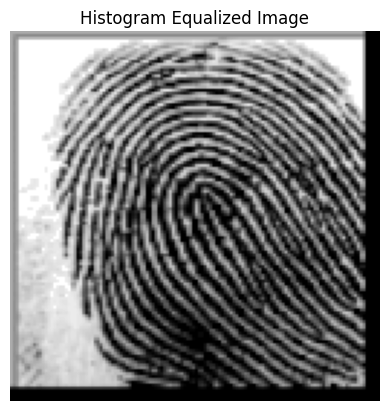

In [ ]:
def apply_histogram_equalization(img):
    return cv2.equalizeHist(img)

# Test histogram equalization
hist_eq_img = apply_histogram_equalization(processed_img)

plt.imshow(hist_eq_img, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')
plt.show()
#This step enhance the contrast 


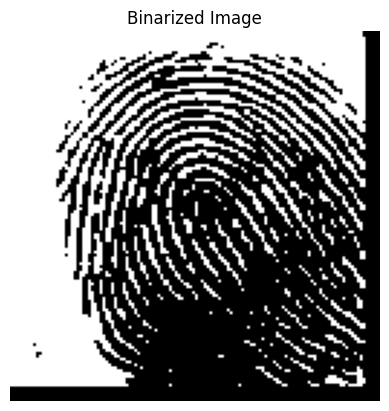

In [ ]:
def binarize_image(img):
    _, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    return binary_img

# Test binarization
binary_img = binarize_image(hist_eq_img)

plt.imshow(binary_img, cmap='gray')
plt.title("Binarized Image")
plt.axis('off')
plt.show()
#converts into black and white 


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Define blood group labels
blood_group_labels = {'A+': 0, 'A-': 1, 'B+': 2, 'B-': 3, 'AB+': 4, 'AB-': 5, 'O+': 6, 'O-': 7}

# Initialize lists
X = []  # Images
y = []  # Labels

# Load processed images
for group, label in blood_group_labels.items():
    folder_path = os.path.join(r"D:\Dataset\dataset_blood_group", group)  # Adjust if needed
    if not os.path.exists(folder_path): 
        print(f"⚠️ Folder missing: {folder_path}")
        continue  # Skip missing folders

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image
        
        if img is not None:
            try:
                img = cv2.resize(img, (128, 128))  # Ensure all images are 128x128
                img = np.array(img, dtype=np.float32) / 255.0  # Normalize (0-1)
                X.append(img)
                y.append(label)
            except Exception as e:
                print(f" Error processing {img_path}: {e}")

# Convert to NumPy arrays
X = np.array(X).reshape(-1, 128, 128, 1)  # Reshape for CNN (batch, height, width, channels)
y = np.array(y)

print("Dataset Loaded Successfully!")
print("Images Shape:", X.shape, "Labels Shape:", y.shape)


✅ Dataset Loaded Successfully!
Images Shape: (6000, 128, 128, 1) Labels Shape: (6000,)


In [ ]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data Split Complete!")
print("Train:", X_train.shape, "Test:", X_test.shape)


✅ Data Split Complete!
Train: (4800, 128, 128, 1) Test: (1200, 128, 128, 1)


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN Model
model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten & Fully Connected Layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(8, activation='softmax')  # 8 classes (A+, A-, B+, B-, AB+, AB-, O+, O-)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display Model Summary
model.summary()


c:\Users\PRAKASH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,096 (12.61 MB)

 Trainable params: 3,305,096 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Define batch size & epochs
BATCH_SIZE = 32
EPOCHS = 20

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)


Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 76s 474ms/step - accuracy: 0.3488 - loss: 1.6636 - val_accuracy: 0.8025 - val_loss: 0.5184
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 67s 443ms/step - accuracy: 0.7325 - loss: 0.7268 - val_accuracy: 0.8217 - val_loss: 0.4637
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 67s 448ms/step - accuracy: 0.7975 - loss: 0.5496 - val_accuracy: 0.8375 - val_loss: 0.3827
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 91s 608ms/step - accuracy: 0.8172 - loss: 0.4907 - val_accuracy: 0.8517 - val_loss: 0.4015
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 59s 390ms/step - accuracy: 0.8146 - loss: 0.5082 - val_accuracy: 0.8875 - val_loss: 0.3009
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 50s 334ms/step - accuracy: 0.8504 - loss: 0.4118 - val_accuracy: 0.8875 - val_loss: 0.3072
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 72s 477ms/step - accuracy: 0.8458 - loss: 0.4149 - val_accuracy: 0.8658 - val_loss: 0.3577
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 74s 489ms/step - accuracy: 0.8629 - loss: 0

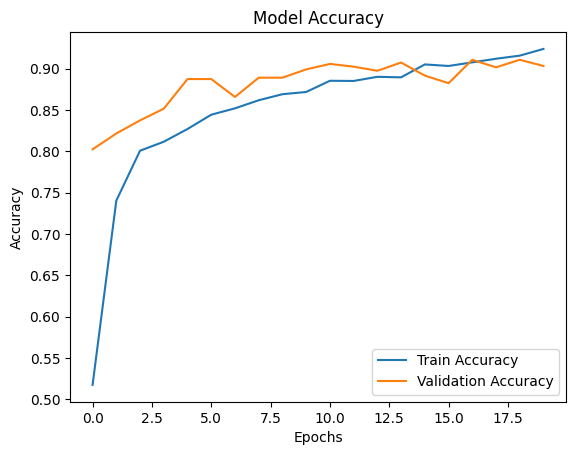

In [20]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


In [ ]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f" Model Test Accuracy: {test_acc*100:.2f}%")


38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.8963 - loss: 0.2623
✅ Model Test Accuracy: 90.33%


38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step


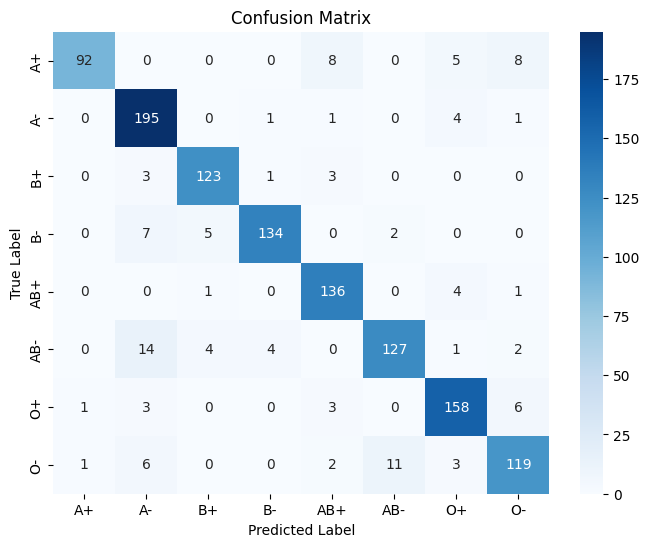

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert softmax outputs to class labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=blood_group_labels.keys(),
            yticklabels=blood_group_labels.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [23]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_classes, target_names=blood_group_labels.keys())
print(report)


              precision    recall  f1-score   support

          A+       0.98      0.81      0.89       113
          A-       0.86      0.97      0.91       202
          B+       0.92      0.95      0.94       130
          B-       0.96      0.91      0.93       148
         AB+       0.89      0.96      0.92       142
         AB-       0.91      0.84      0.87       152
          O+       0.90      0.92      0.91       171
          O-       0.87      0.84      0.85       142

    accuracy                           0.90      1200
   macro avg       0.91      0.90      0.90      1200
weighted avg       0.91      0.90      0.90      1200



In [24]:
model.save("blood_group_cnn.h5")
print("Model Saved Successfully!")


✅ Model Saved Successfully!
